# Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [51]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [52]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [53]:
num_rows = df.shape[0]
num_rows

294478

c. The number of unique users in the dataset.

In [54]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [55]:
people_converted = df[df.converted==1]
proportion_converted = people_converted.shape[0]/num_rows
proportion_converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [56]:
not_match = df.query('landing_page=="new_page" & not(group=="treatment") | group=="treatment" and not(landing_page=="new_page")')
not_match.shape[0]

3893

f. Do any of the rows have missing values?

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There are no missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

best way to deal with these rows is to drob them.

In [58]:
df2 = df.drop(not_match.index)

In [59]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [60]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [61]:
# To get the duplicated user we can use value_counts and look for the value 2
df2.user_id.value_counts()[df2.user_id.value_counts()==2]

773192    2
Name: user_id, dtype: int64

In [62]:
# Have a look at the 2 rows with the same user_id
df2[df2.user_id==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [63]:
# We can look at eathier index 1899 or 2893
df2.loc[2893]

user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
Name: 2893, dtype: object

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [64]:
df2.drop(2893, inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [65]:
# Get all converted people
converted = df2.query('converted==1')
# Divide the number of all people converted / the number all people
converted_rate = converted.shape[0]/df2.shape[0]
converted_rate

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [66]:
# Get control group
control = df2.query('group=="control"')
# People converted from control group
control_converted = control.query('converted==1')
# Get proportion of people converted from control group
control_converted_prop = control_converted.shape[0]/control.shape[0]
control_converted_prop

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [67]:
# Treatment group
treatment = df2.query('group=="treatment"')
# poeple converted from treatment group
treatment_converted = treatment.query('converted==1')
# Get proportion of poeple converted from treatment group
treatment_converted_prop = treatment_converted.shape[0]/treatment.shape[0]
treatment_converted_prop

0.11880806551510564

d. What is the probability that an individual received the new page?

In [68]:
# Get all poeple converted
new_page = df2.query('landing_page=="new_page"')
new_page.shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**I don't think there is sufficient evidence to conclude that the new treatment page leads to more conversions..**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$** : **$p_{new}$** <= **$p_{old}$**<br>
**$H_{1}$** : **$p_{new}$** > **$p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [69]:
# use the variable p_new for the conversion rate for 𝑝𝑛𝑒𝑤
p_new = converted_rate
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [70]:
# use the variable p_old for the conversion rate for 𝑝𝑜𝑙𝑑
p_old = converted_rate
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [71]:
n_new = treatment.user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [72]:
n_old = control.user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [73]:
# Use np.random.choice to simulate the transactions
new_page_converted = np.random.choice([1,0], p=[p_new, 1-p_new], size=n_new)
new_page_converted

array([1, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [74]:
old_page_converted = np.random.choice([1,0], p=[p_old, 1-p_old], size=n_old)
old_page_converted

array([0, 0, 0, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [75]:
new_page_converted.mean() - old_page_converted.mean() 

0.001498468225009042

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [76]:
# We can use np.random.binomial to create the 10000 process instead of a loop
sim_new = np.random.binomial(n_new, p_new, 10000)/n_new
sim_old = np.random.binomial(n_old, p_old, 10000)/n_old
diffs = sim_new-sim_old

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

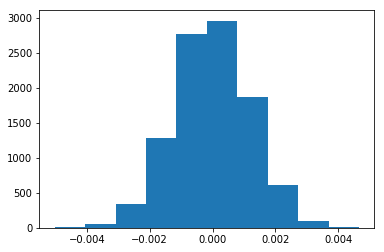

In [77]:
plt.hist(diffs);

Yes it looks like a normal disrtibution as expected

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

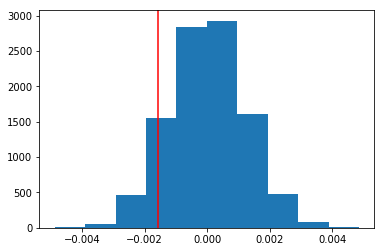

In [78]:
# Get observed difference
obs_diff = treatment_converted_prop - control_converted_prop
# Create ditribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), 10000)
# Plot the null distribution and a vertical line of the observed difference
plt.hist(null_vals)
plt.axvline(obs_diff, color='red');

In [79]:
# Get the p_palue
p_value = (null_vals > obs_diff).mean()
p_value

0.9032

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**what I calculated in the previous question is the p-value. the value 0.90 means that we fail to reject the null hypothesis. There is no significant difference between the old and new page, and old page is maybe slightly better. In other words, we should keep the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [80]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# Number of poeple converted from old page
convert_old = control_converted.shape[0]
# Number of poeple converted from new page
convert_new = treatment_converted.shape[0]
# Number of peole received old page
n_old = control.shape[0]
# Number of peole received new page
n_new = treatment.shape[0]
# print numbers
print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [81]:
proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**the z-score and p-value agree with the findings in parts j and k. Hence, we fail to reject the null hypothesis and conclude that new page is not better than old page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [82]:
# Instead of making two dummy variable columns for each page and then drop one of them, we can simply 
# create only one columns with 1 when an individual receives the treatment and 0 if control. 
df2['ab_page'] = (df2['group']=='treatment').astype(int)

In [83]:
# Create intercept
df2['intercept'] = 1

In [84]:
# Let's have a look on the data
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [85]:
# Create logistic regression model using only intercept and ab_page
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
preds = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [86]:
# See summary
preds.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-31 20:18 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with `ab_page` is 0.19. which is larger than type1 error (0.05) that means `ab_page` is not statistically significant in predicting whether the viewer will convert or not.**

the null and alternative hypotheses associated with your regression model:
<br>**$H_{0}$** : **$p_{new}$** - **$p_{old}$ = 0**<br>
**$H_{1}$** : **$p_{new}$** - **$p_{old}$ != 0**

the null and alternative hypotheses in **Part II**:
<br>**$H_{0}$** : **$p_{new}$**  **$p_{old}$ <= 0**<br>
**$H_{1}$** : **$p_{new}$** - **$p_{old}$ > 0**

***The p-value differ from the value you found in Part II because the null and alternative hypotheses differ in each one***

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**considering other factors (like timestamp variable) is a good idea, as it will add more data that can be analyzed to get a better conlcusion. but it can make the model more complex and can cause multicollinearity or overfitting**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [87]:
# Read countries data
countries = pd.read_csv('countries.csv')
# Look at first 5 rows
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [88]:
# Merge countries with our data frame (df2) and put the new data frame in df3
df3 = df2.merge(countries, left_on='user_id', right_on='user_id')
# Look at our new data frame
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


In [89]:
# Create dummy variables from country
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3.country)
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1


In [90]:
# Create new Logistic regression model
model2 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'US', 'UK']])
res2 = model2.fit()
res2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-31 20:18 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

**The p-values for US and UK are larger than $\alpha$ (0.05). that means we fail to reject the null hypothesis. Which means Coutries have no significant effect on conversion rate.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [91]:
# Create needed columns to see the effect of interaction between page and country
df3['ab_page_US'] = df3['ab_page'] * df3['US']
df3['ab_page_UK'] = df3['ab_page'] * df3['UK']
df3['ab_page_CA'] = df3['ab_page'] * df3['CA']
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US,ab_page_US,ab_page_UK,ab_page_CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1,0,0,0


In [92]:
# Create new Logistic regression model
model3 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'ab_page_UK', 'ab_page_US', 'UK', 'US']])
res3 = model3.fit()
res3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-31 20:18 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
ab_page_UK     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_page_US     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
==================================================================

"""

In [93]:
np.exp(res3.params)

intercept     0.134794
ab_page       0.934776
ab_page_UK    1.081428
ab_page_US    1.048001
UK            1.011854
US            1.017682
dtype: float64

## Conclusion

- It seems that the only p-value less than 0.05 is with intercept variable, which is statistically significant enough for converted rate, but other variables are not statistically significant. 
- for every ab_page increase, people converted will be 7.0% less likely while holding all other varibles constant.
- people in UK who received new_page are 1.08 times more likely to convert than people in CA who received new_page while holding all other varible constant.

- people in US who received new_page are 1.04 times more likely to convert than people in CA who received new_page while holding all other varible constant.

-  According to the results from A/B test and regression models, the old page seems to perform equal to or even slightly better than the new one, So,<br>**I suggest that the company should stick to the old page**

In [94]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0